# Building a product recommender

# 1.Read and explore the dataset. 

In [2]:
%matplotlib inline

import pandas
from sklearn.model_selection import train_test_split
import numpy as np
import time
from sklearn.externals import joblib
import Recommenders as Recommenders
import Evaluation as Evaluation

In [3]:
prod_df = pandas.read_csv('product_ratings.csv',header=None)
prod_df.columns = ['user_id', 'prod_id', 'rating','timestamp']

In [6]:
print(prod_df.head())
len(prod_df)

          user_id     prod_id  rating   timestamp
0   AKM1MP6P0OYPR  0132793040     5.0  1365811200
1  A2CX7LUOHB2NDG  0321732944     5.0  1341100800
2  A2NWSAGRHCP8N5  0439886341     1.0  1367193600
3  A2WNBOD3WNDNKT  0439886341     3.0  1374451200
4  A1GI0U4ZRJA8WN  0439886341     1.0  1334707200


7824482

In [10]:
prod_df=prod_df.drop(['timestamp'], axis=1)
prod_df.head(10)

,user_id,prod_id,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0
5,A1QGNMC6O1VW39,0511189877,5.0
6,A3J3BRHTDRFJ2G,0511189877,2.0
7,A2TY0BTJOTENPG,0511189877,5.0
8,A34ATBPOK6HCHY,0511189877,5.0
9,A89DO69P0XZ27,0511189877,5.0


# 2.Explore data

Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 50 or more number of ratings )

In [11]:
prod_df.groupby('user_id').filter(lambda x : x['prod_id'].count() > 50)

,user_id,prod_id,rating
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0
631,A3TAS1AG6FMBQW,0972683275,5.0
1138,A25RTRAPQAJBDJ,0972683275,5.0
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0
1335,A2XIOXRRYX0KZY,1400501466,3.0
1451,AW3LX47IHPFRL,1400501466,5.0


In [12]:
grouped_prod=prod_df.groupby('user_id').filter(lambda x : x['prod_id'].count() > 50)

In [17]:
grouped_prod.shape

(122171, 3)

## 3. Split the data randomly into train and test dataset. (For example split it in 70/30 ratio)

In [18]:
train_data, test_data = train_test_split(grouped_prod, test_size = 0.30, random_state=0)
print(train_data.head(5))

                user_id     prod_id  rating
1374364  A1S7BFT0HDF3HA  B000TO1SMG     4.0
5343006  A1J75JJ0Q2OEJN  B0069QZ676     4.0
1903477   AGVWTYW0ULXHT  B001CHHVCU     3.0
1060012   ABXANRX4GPYRZ  B000IV413S     5.0
7187913  A1XE3M22N91451  B00BXA7N6A     5.0


## 4. Build Popularity Recommender model.

## Count number of unique users in the dataset

In [21]:
users = grouped_prod['user_id'].unique()

In [22]:
len(users)

1466

##  Count the number of unique products in the dataset

In [23]:
###Fill in the code here
prod = grouped_prod['prod_id'].unique()
len(prod)

47155

## Simple popularity-based recommender class (Can be used as a black box)

### Create an instance of popularity based recommender class

In [25]:
pm = Recommenders.popularity_recommender_py()
pm.create(train_data, 'user_id', 'prod_id')

### Use the popularity model to make some predictions

In [29]:
users[20]

'ALUNVOQRXOZIA'

In [30]:
user_id = users[20]
pm.recommend(user_id)

,user_id,prod_id,score,Rank
30197,ALUNVOQRXOZIA,B0088CJT4U,150,1.0
19162,ALUNVOQRXOZIA,B003ES5ZUU,130,2.0
8448,ALUNVOQRXOZIA,B000N99BBC,112,3.0
29619,ALUNVOQRXOZIA,B007WTAJTO,104,4.0
29901,ALUNVOQRXOZIA,B00829TIEK,104,5.0
29897,ALUNVOQRXOZIA,B00829THK0,94,6.0
16945,ALUNVOQRXOZIA,B002R5AM7C,85,7.0
22207,ALUNVOQRXOZIA,B004CLYEDC,83,8.0
30455,ALUNVOQRXOZIA,B008DWCRQW,82,9.0
17122,ALUNVOQRXOZIA,B002SZEOLG,79,10.0


In [31]:
user_id = users[7]
pm.recommend(user_id)

,user_id,prod_id,score,Rank
30197,A1A5KUIIIHFF4U,B0088CJT4U,150,1.0
19162,A1A5KUIIIHFF4U,B003ES5ZUU,130,2.0
8448,A1A5KUIIIHFF4U,B000N99BBC,112,3.0
29619,A1A5KUIIIHFF4U,B007WTAJTO,104,4.0
29901,A1A5KUIIIHFF4U,B00829TIEK,104,5.0
29897,A1A5KUIIIHFF4U,B00829THK0,94,6.0
16945,A1A5KUIIIHFF4U,B002R5AM7C,85,7.0
22207,A1A5KUIIIHFF4U,B004CLYEDC,83,8.0
30455,A1A5KUIIIHFF4U,B008DWCRQW,82,9.0
17122,A1A5KUIIIHFF4U,B002SZEOLG,79,10.0


### Quiz 2: Use the popularity based model to make predictions for the following user id (Note the difference in recommendations from the first user id).

In [32]:
###Fill in the code here
user_id = users[8]
pm.recommend(user_id)


,user_id,prod_id,score,Rank
30197,A2XIOXRRYX0KZY,B0088CJT4U,150,1.0
19162,A2XIOXRRYX0KZY,B003ES5ZUU,130,2.0
8448,A2XIOXRRYX0KZY,B000N99BBC,112,3.0
29619,A2XIOXRRYX0KZY,B007WTAJTO,104,4.0
29901,A2XIOXRRYX0KZY,B00829TIEK,104,5.0
29897,A2XIOXRRYX0KZY,B00829THK0,94,6.0
16945,A2XIOXRRYX0KZY,B002R5AM7C,85,7.0
22207,A2XIOXRRYX0KZY,B004CLYEDC,83,8.0
30455,A2XIOXRRYX0KZY,B008DWCRQW,82,9.0
17122,A2XIOXRRYX0KZY,B002SZEOLG,79,10.0


## 5.Build Collaborative Filtering model.

We now create an item similarity based collaborative filtering model that allows us to make personalized recommendations to each user. 

## Class for an item similarity based personalized recommender system

### Create an instance of item similarity based recommender class

In [34]:
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'user_id', 'prod_id')

### Use the personalized model to make some song recommendations

In [35]:
#Print the products for the user in training data
user_id = users[5]
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data products for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend products for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data products for the user userid: A25RTRAPQAJBDJ:
------------------------------------------------------------------------------------
B00009ZOIZ
B007W66RCU
B00BCA41PW
B00JC5Y6YA
B000BMHERE
B0036CGZEE
B000BYVIQU
B005NCNDOU
B000JLU2A8
B00FXPL1XM
B004CLYEDC
B0009IG3U4
B003YNO0LA
B003PL0AME
B000PAS9IU
B00A2T6X0K
B00871SR68
B00DUTIZJG
0972683275
B008MF48J4
B0096J0WRW
B008R6WUZC
B00BF9I0JI
B000BPNUCY
B0002KRCHW
B00902SFC4
B00009W3IB
B00009UH9J
B009APC0R2
B005DKZTNK
B0002CNTU4
B000782SLO
B009QV744O
B00JY4QCJQ
B000EHHOOE
B005TDWVQY
B000PH7X30
B0034CL2ZI
B004CZ9U96
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 39
no. of unique songs in the training set: 37385
Non zero values in cooccurence_matrix :22429


,user_id,song,score,rank
0,A25RTRAPQAJBDJ,B00CAN88VI,0.015770,1
1,A25RTRAPQAJBDJ,B004CLYEE6,0.013550,2
2,A25RTRAPQAJBDJ,B005I6EU48,0.013406,3
3,A25RTRAPQAJBDJ,B0088CJT4U,0.013398,4
4,A25RTRAPQAJBDJ,B00EPAVKGY,0.013248,5
5,A25RTRAPQAJBDJ,B003GZDB1Q,0.012821,6
6,A25RTRAPQAJBDJ,B001VKQR5U,0.012821,7
7,A25RTRAPQAJBDJ,B003ICXCZM,0.012821,8
8,A25RTRAPQAJBDJ,B00IAUJF6W,0.012821,9
9,A25RTRAPQAJBDJ,B00000K0JC,0.012821,10


### Quiz 3. Use the personalized model to make recommendations for the following user id. (Note the difference in recommendations from the first user id.)

In [36]:
user_id = users[7]
#Fill in the code here
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data products for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)


------------------------------------------------------------------------------------
Training data products for the user userid: A1A5KUIIIHFF4U:
------------------------------------------------------------------------------------
B00G2J0XUA
B003ULJU2A
B007RHD2P4
B00IO54MLQ
B006B7R9TG
B002QVMYQE
B006VZI4QA
B0034USE2E
B000HCNZI0
B0048FBCKK
B00AY1FDFM
B005UWD0EG
B003VWU79I
B003U4M7CM
B008C4VLJK
B000I21YDM
B00A1PCKM0
B0000C2GU8
B00AY1FEGK
B000COVX7I
B005V3KVU0
B008J4C8PE
B0043TB7OC
B0026SKZO0
B0036FW3YM
B003M6FDS8
B00AY1FE2O
B0081IQNE0
B000JJGR5O
B00006B6GD
B004FD1GL0
B0000516CS
B005Z1E3IY
B006N130AC
B001UDTTJE
B0035H4164
B001KUASU6
B002B480PA
B004TBBSNY
B00425S1H8
B004HPGTD6
B0002J1JC2
B00007IFED
1400501466
B001F06Y0E
B0000514R8
B0035PS5AO
B005UBNJ48
B00015XMDG
B000HEEG54
B005HMZ8B2
B000NOUMVK
B004QMT9D2
B00C5RENY0
B001EDA0Y8
B009AF4ZL6
B002HK5AW4
B003UU88DI
B0062D058G
B008PT88AW
B004LPC4OA
B001B19HGA
B0043VAKBQ
B001EVY5Y6
B009F1J4R0
B003ZWPRUI
B0015IQPUU
---------------------------------

,user_id,song,score,rank
0,A1A5KUIIIHFF4U,B00AFXEMCE,0.009950,1
1,A1A5KUIIIHFF4U,B0009JR82U,0.009826,2
2,A1A5KUIIIHFF4U,B004JZPZ34,0.008706,3
3,A1A5KUIIIHFF4U,B003B1ITFS,0.008706,4
4,A1A5KUIIIHFF4U,B0071368WI,0.007463,5
5,A1A5KUIIIHFF4U,B00FY9RKW8,0.007463,6
6,A1A5KUIIIHFF4U,B001G4QXTQ,0.007463,7
7,A1A5KUIIIHFF4U,B00FDL8TF4,0.007463,8
8,A1A5KUIIIHFF4U,B003V70LYE,0.007463,9
9,A1A5KUIIIHFF4U,B001K7I62Q,0.007463,10


### We can also apply the model to find similar products to any product in the dataset

In [37]:
is_model.get_similar_items(['B004CZ9U96'])

no. of unique songs in the training set: 37385
Non zero values in cooccurence_matrix :1227


,user_id,song,score,rank
0,,B002VPE1XE,0.137931,1
1,,B0085RUZFA,0.095238,2
2,,B0029LB5D4,0.095238,3
3,,B001418UU6,0.090909,4
4,,B008E18PDG,0.090909,5
5,,B002TLTE6Y,0.088235,6
6,,B00FJWKYYG,0.085714,7
7,,B00IX2VGFA,0.085714,8
8,,B002TLSOGK,0.083333,9
9,,B008X9ZDGG,0.083333,10


In [38]:
song = 'B004CZ9U96'
###Fill in the code here
is_model.get_similar_items([song])

no. of unique songs in the training set: 37385
Non zero values in cooccurence_matrix :1227


,user_id,song,score,rank
0,,B002VPE1XE,0.137931,1
1,,B0085RUZFA,0.095238,2
2,,B0029LB5D4,0.095238,3
3,,B001418UU6,0.090909,4
4,,B008E18PDG,0.090909,5
5,,B002TLTE6Y,0.088235,6
6,,B00FJWKYYG,0.085714,7
7,,B00IX2VGFA,0.085714,8
8,,B002TLSOGK,0.083333,9
9,,B008X9ZDGG,0.083333,10


## Quantitative comparison between the models

In [ ]:
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Instantiate the precision_recall_calculator class
pr = Evaluation.precision_recall_calculator(test_data, train_data, pm, is_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

In [43]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.2])
    pl.xlim([0.0, 0.2])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

Plotting precision recall curves.


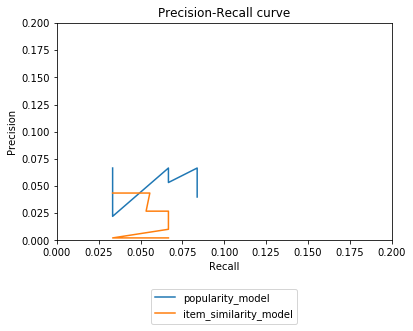

In [44]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

In [ ]:
Precision and recall pap